In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
from timeit import time
from shape import Shape, Block
from shape_boat import ShapeBoat, ShapeBoat_spline
from shapeshift_trajectory import shapeshift_trajectory, write_results, experiments, print_results_tables


## 1. Composing Shapes from Blocks

In [2]:
s = .90625

shape_1a = Shape([Block(0,0,scale=s)])
shape_1b = Shape([Block(0,0,90,scale=s)])
shape_2a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s)])
shape_2b = Shape([Block(0,0.25,scale=s),   Block(0,-0.25,scale=s)])
shape_2c = Shape([Block(-.25,0,90,scale=s),Block(0.25,0,90,scale=s)])
shape_2d = Shape([Block(0,-.5,90,scale=s) ,Block(0,.5,90,scale=s)])
shape_2e = Shape([Block(0,-0.5,90,scale=s),Block(0.25,0.25,0,scale=s)])
shape_2f = Shape([Block(-0.25,0.25,90,scale=s),Block(0.25,-0.25,90,scale=s)])
shape_3a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-1.25,0.25,90,scale=s)])
shape_3b = Shape([Block(-.5,0,scale=s),    Block(.5,0,0,scale=s), Block(-.5,0.5,scale=s)])
shape_3c = Shape([Block(0,0,scale=s),      Block(-1,0,scale=s),   Block(1,0,scale=s)])
shape_4a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-1.25,0.25,90,scale=s),Block(1.25,0.25,90,scale=s)])
shape_4b = Shape([Block(-.5,-.25,scale=s), Block(-.5,.25,scale=s),Block(.5,-.25,scale=s),      Block(.5,.25,scale=s)])
shape_6a = Shape([Block(0,0,scale=s),      Block(1.,0,scale=s),   Block(0,0.5,scale=s),        Block(-1.,0.5,scale=s),Block(1.,0.5,scale=s),Block(1.,-.5,scale=s)])

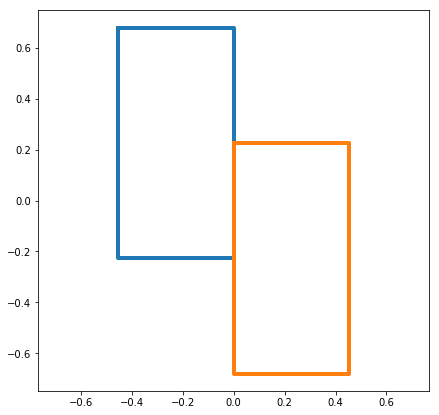

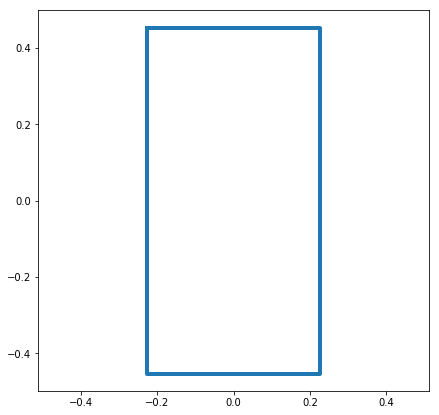

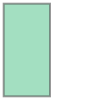

In [3]:
moving_shape=shape_2f
obstacle_shape=shape_1b

moving_shape.plot(union=False)
obstacle_shape.plot(union=False)
from shapely import ops, geometry
obstacle_shape.polygon.simplify(0.2, preserve_topology=False)


### Partitioning of convex hulls around shape

In [4]:
msums, hulls = obstacle_shape.c_space_rotate(moving_shape)
#plot_hulls(hulls, text=False)

### C-Space of a given obstacle b

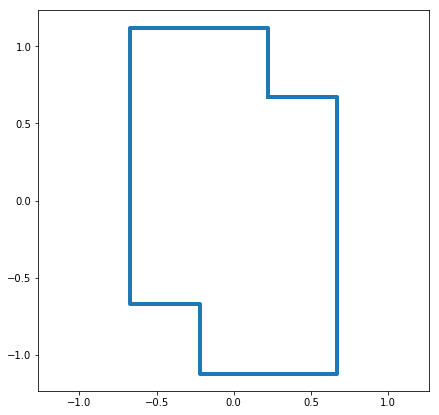

In [5]:
moving_shape.plot_polygons([msums.values()[3]])

### Finding Convex Hull of C-Space

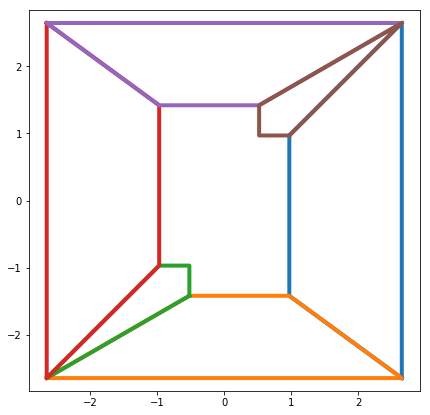

In [6]:
moving_shape.plot_polygons(hulls.values()[3])

## 2. Trajectory Planning

In [7]:
tests = {'1_step1':         (shape_1b, shape_2c, (s*-0.75, s*0.,     0.),  (s*-0.25,    s*1.0,    0.)),  \
         '1_step2':        (shape_2d, shape_1b, (s*-0.5, s*0.5,     0.),  (s*0.0,    s*1.5,    0.)),  \
         '2_step1':         (shape_1b, shape_2c, (s*-.75, s*0.0,     0.),  (s*0.,    s*.75,   90.)), \
         '2_step2':        (shape_2e, shape_1b, (s*-0.5, s*0.5,     0.),  (s*-1.25,    s*-0.25,    90.)),  \
         '3_step1':        (shape_1b, shape_2c, (s*-0.75, s*0.,     0.),  (s*-0.75,    s*0.5,    0.)),  \
         '3_step2':        (shape_2f, shape_1b, (s*-0.75, s*0.25,     0.),  (s*0.25,    s*0.75,    0)),  \
        }

### MIQP - b-splines

SETTING ENDPOINTS
Calculated C-Space: 0.194806 seconds
Set up graph: 0.238247 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-1.1328125 -0.2265625) 90.0
found path endpoint hulls 47 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.001989 seconds
ADDING COSTS
Number of costs 13
0.005231 seconds
ADDING CONSTRAINTS
None
Number of constraints 1160
0.133647 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.265042 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.167116 seconds
Set up graph: 0.270146 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-1.1328125 -0.2265625) 90.0
found path endpoint hulls 47 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002492 seconds
ADDING COSTS
Number of costs 12
0.004519 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 42
0.031041 seconds
PLANNING
SolutionResult.kSolutionFound
So

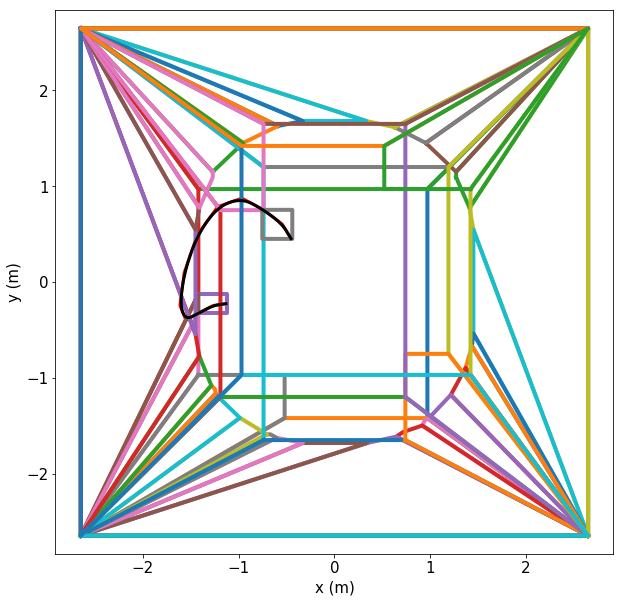

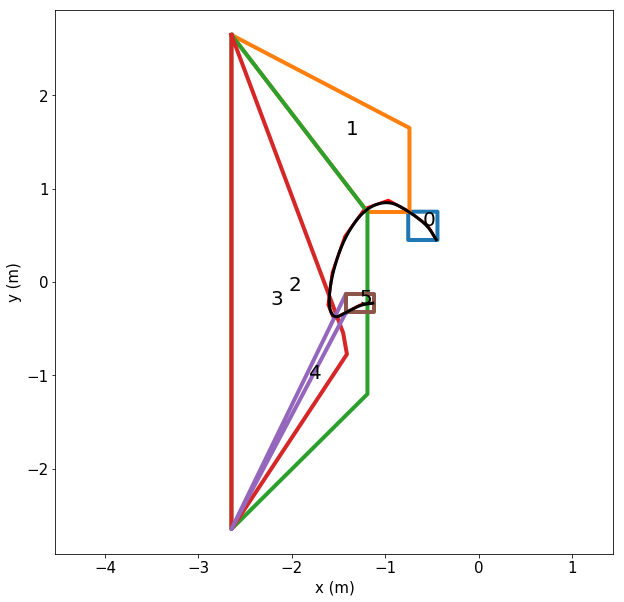

In [8]:
test = '2_step2'

x = time.time()
experiment = shapeshift_trajectory(*tests[test], N=11, boat_type=ShapeBoat_spline, boat_type_init=ShapeBoat_spline)
#print experiment['S'].shape, experiment['U'].shape
name = test + "_2_13.txt"
np.savetxt(name, np.hstack((experiment['S'][0,:,:],experiment['U'][0,:,:])), delimiter=",")
data = {'S':experiment['S'][0],
        'U':experiment['U'][0]}
with open(test + '.pkl', 'wb') as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

### Animation

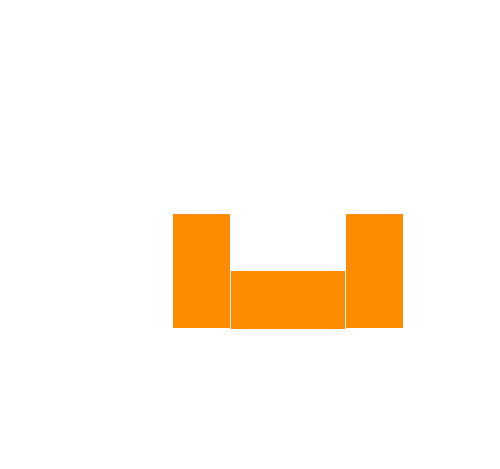

In [9]:
from IPython.display import HTML
HTML(experiment['boat'].plot_animation(experiment['S']).to_html5_video())

### Show polytope graph from plan

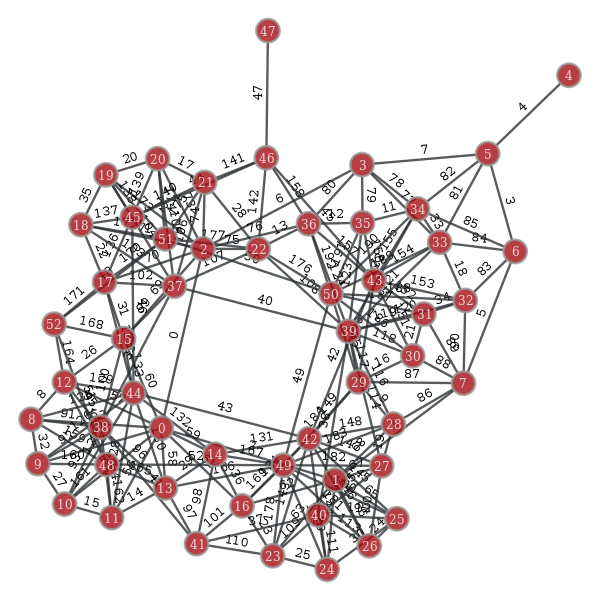

In [9]:
experiment['boat'].g.draw_graph()

## 3. Running Experiments

SETTING ENDPOINTS
Calculated C-Space: 0.208096 seconds
Set up graph: 0.195614 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39
INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002427 seconds
ADDING COSTS
Number of costs 2
0.001013 seconds
ADDING CONSTRAINTS
None
Number of constraints 619
0.069669 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.147890 seconds



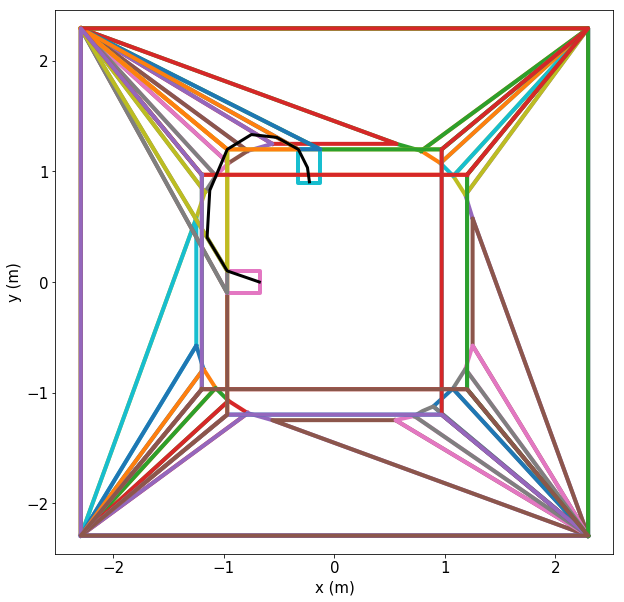

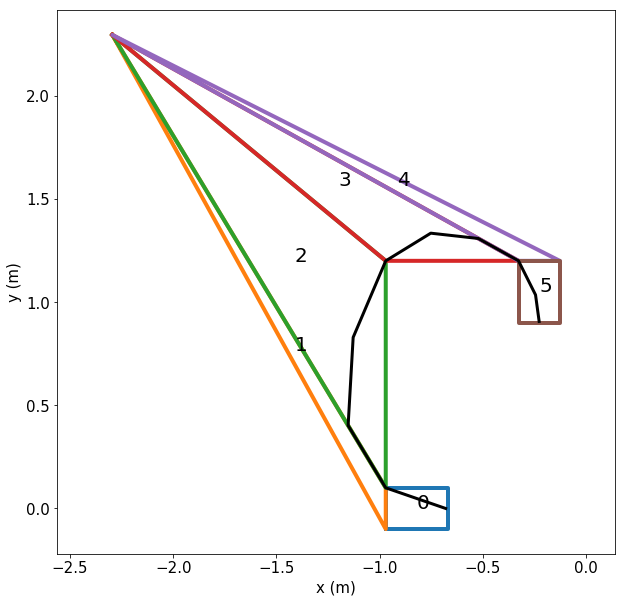

SETTING ENDPOINTS
Calculated C-Space: 0.273698 seconds
Set up graph: 0.189190 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 42 45
INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002086 seconds
ADDING COSTS
Number of costs 2
0.001080 seconds
ADDING CONSTRAINTS
None
Number of constraints 619
0.040585 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.120033 seconds



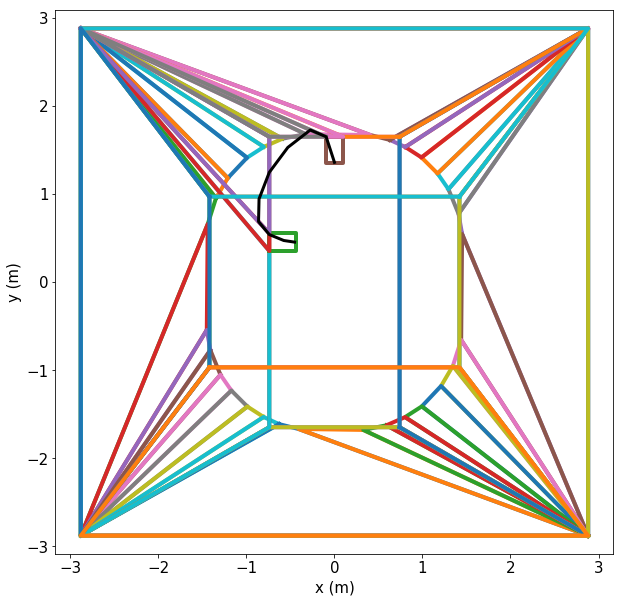

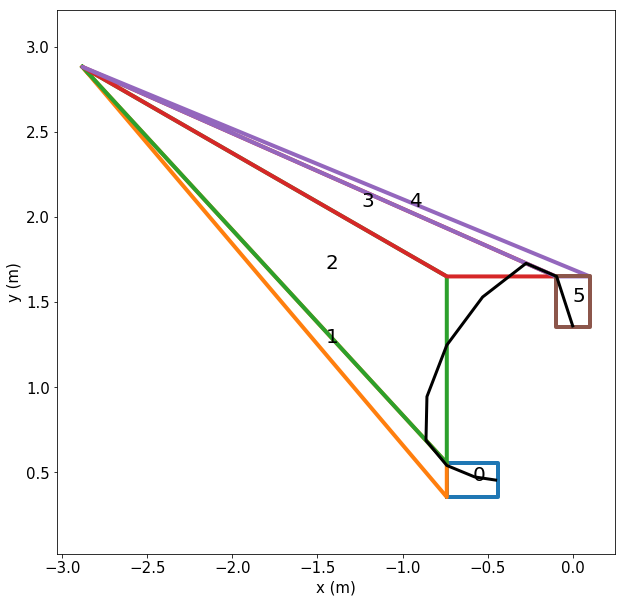

SETTING ENDPOINTS
Calculated C-Space: 0.154400 seconds
Set up graph: 0.244253 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 44 45
INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001851 seconds
ADDING COSTS
Number of costs 2
0.000979 seconds
ADDING CONSTRAINTS
None
Number of constraints 699
0.044995 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.118702 seconds



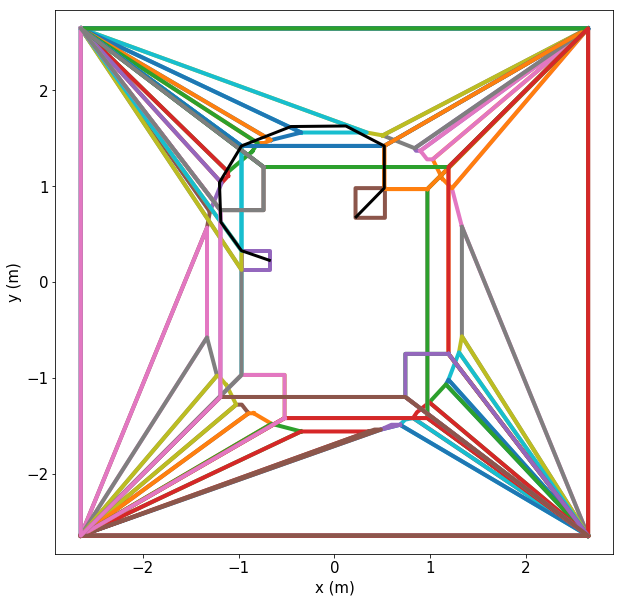

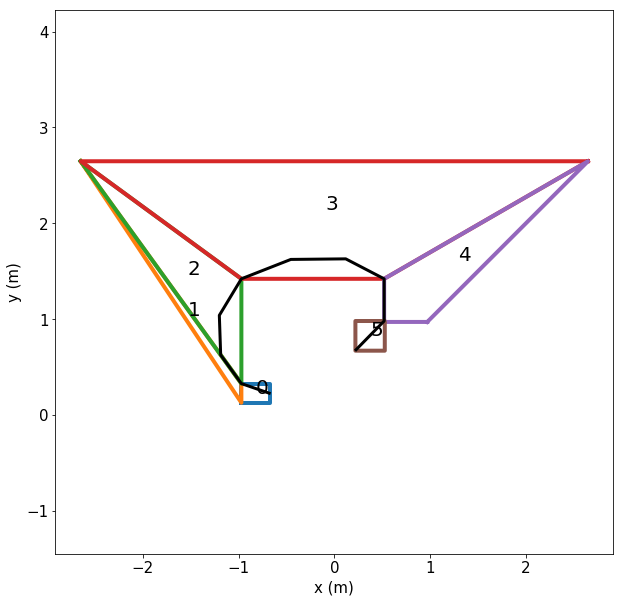

SETTING ENDPOINTS
Calculated C-Space: 0.196808 seconds
Set up graph: 0.196120 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 36 37
INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.001669 seconds
ADDING COSTS
Number of costs 2
0.001040 seconds
ADDING CONSTRAINTS
None
Number of constraints 541
0.035960 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.123251 seconds



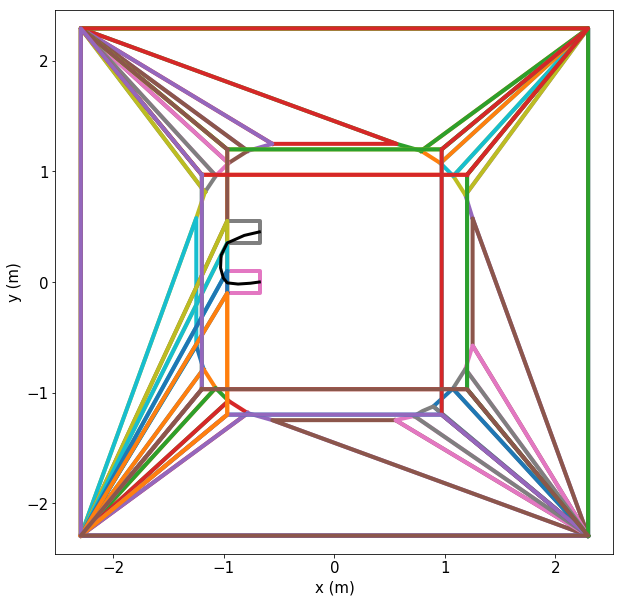

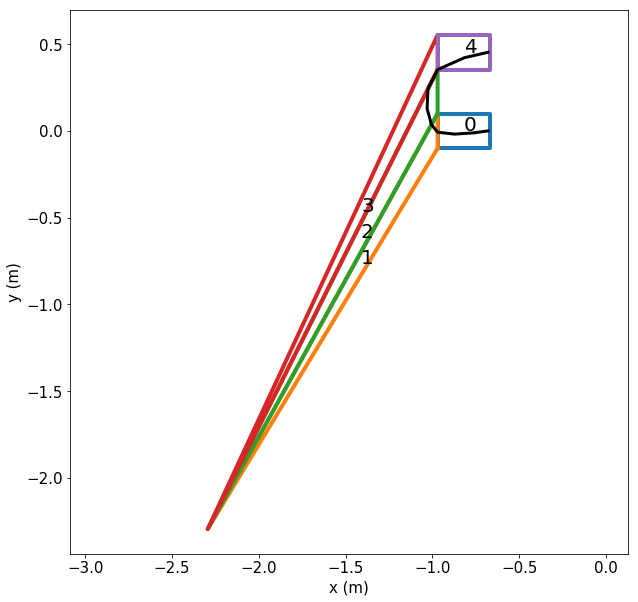

SETTING ENDPOINTS
Calculated C-Space: 0.172987 seconds
Set up graph: 0.231417 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-1.1328125 -0.2265625) 90.0
found path endpoint hulls 47 4
INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002066 seconds
ADDING COSTS
Number of costs 2
0.000989 seconds
ADDING CONSTRAINTS
None
Number of constraints 719
0.047289 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.184742 seconds



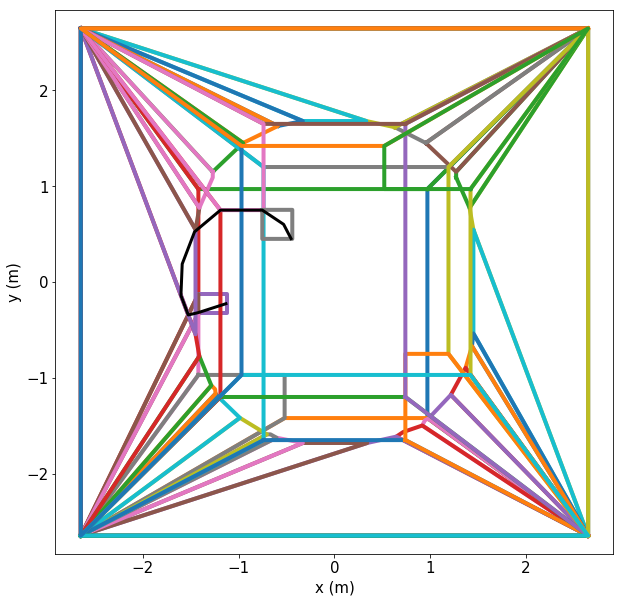

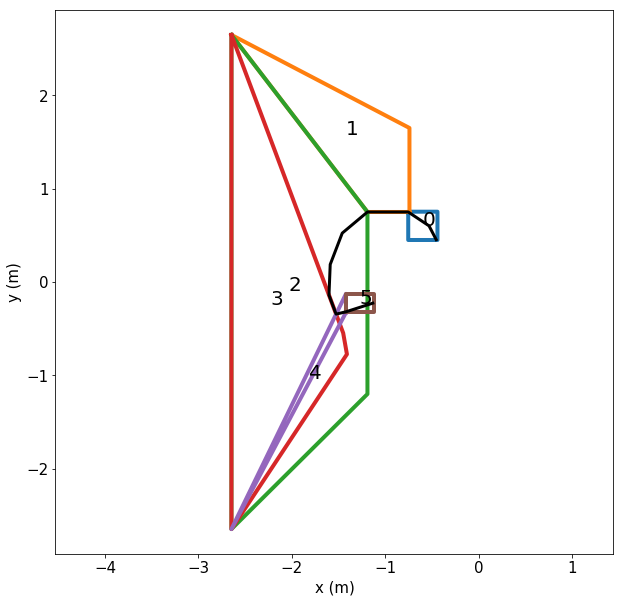

SETTING ENDPOINTS
Calculated C-Space: 0.189329 seconds
Set up graph: 0.184129 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4
INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.002314 seconds
ADDING COSTS
Number of costs 2
0.000970 seconds
ADDING CONSTRAINTS
None
Number of constraints 737
0.049652 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.091902 seconds



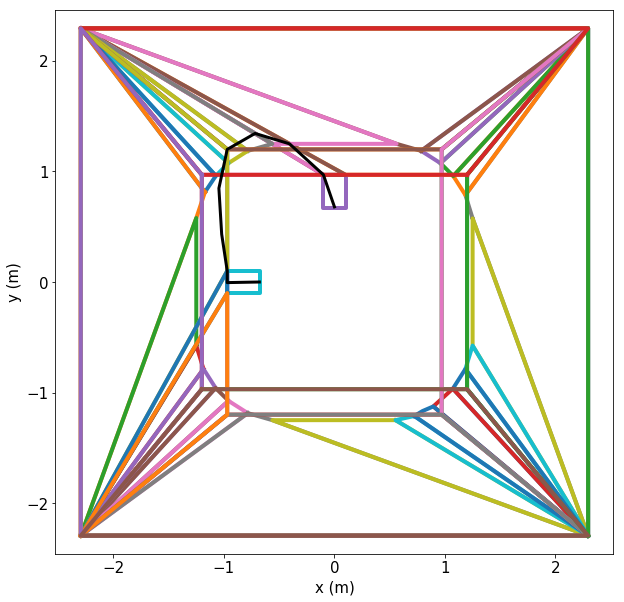

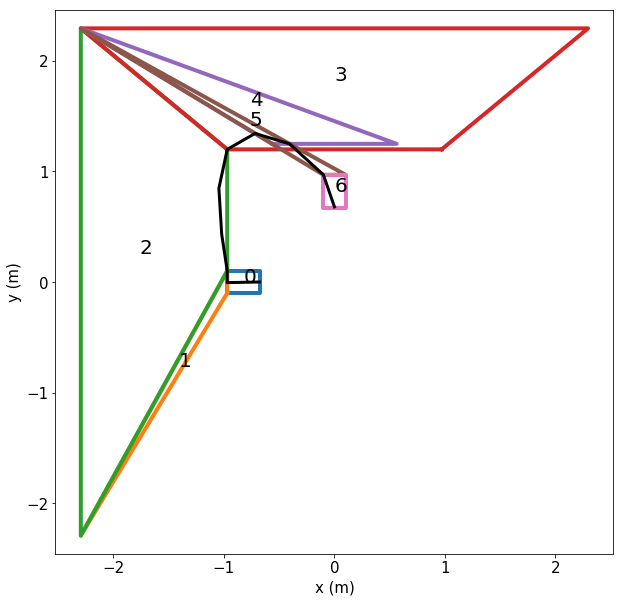

SETTING ENDPOINTS
Calculated C-Space: 0.306898 seconds
Set up graph: 0.199331 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001937 seconds
ADDING COSTS
Number of costs 12
0.004643 seconds
ADDING CONSTRAINTS
None
Number of constraints 899
0.110718 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.127107 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.227947 seconds
Set up graph: 0.398850 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002774 seconds
ADDING COSTS
Number of costs 11
0.004063 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.021763 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.02519

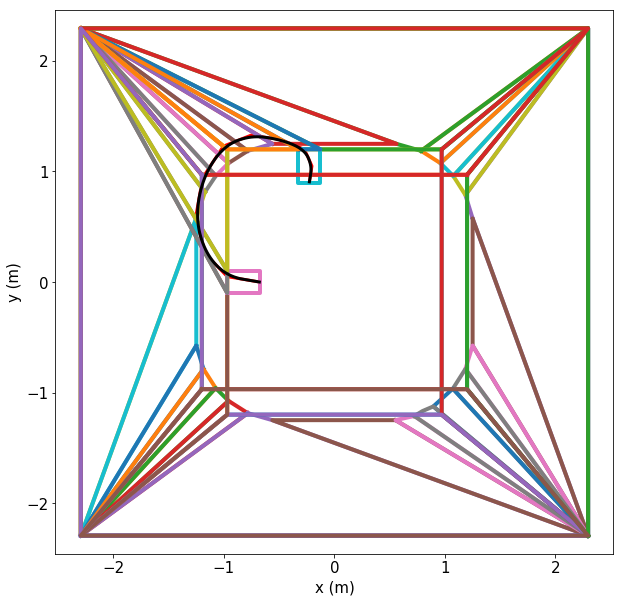

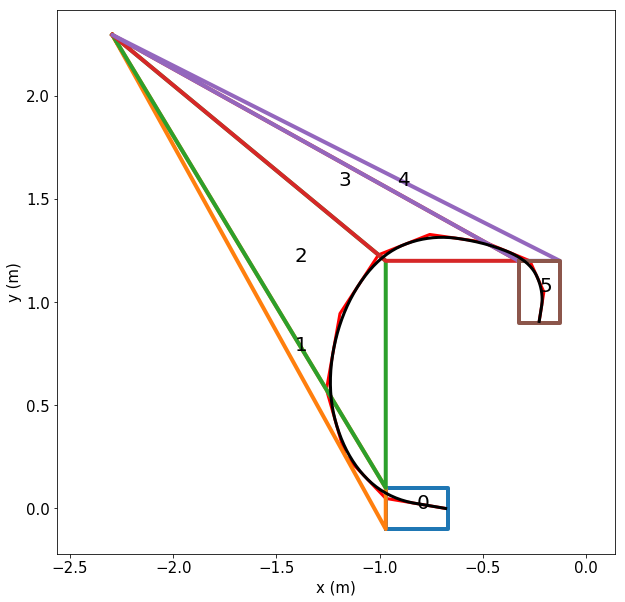

SETTING ENDPOINTS
Calculated C-Space: 0.212481 seconds
Set up graph: 0.270943 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 42 45
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001817 seconds
ADDING COSTS
Number of costs 12
0.005404 seconds
ADDING CONSTRAINTS
None
Number of constraints 899
0.111353 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.233794 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.214868 seconds
Set up graph: 0.269091 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 42 45
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002793 seconds
ADDING COSTS
Number of costs 11
0.004077 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.022078 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.028826 se

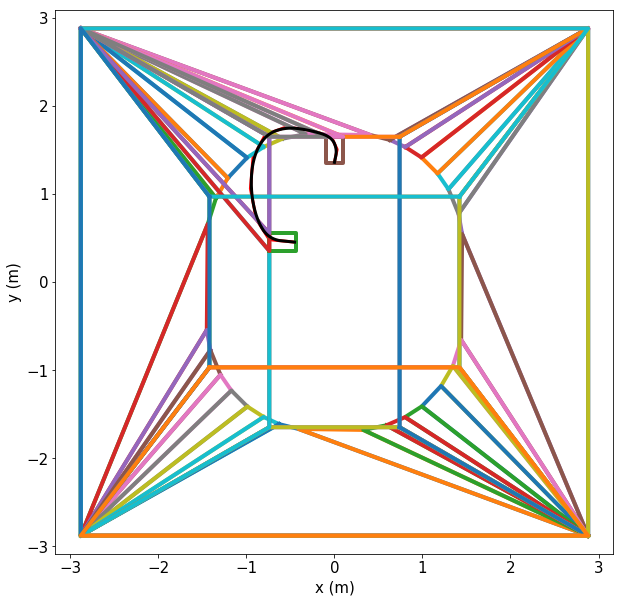

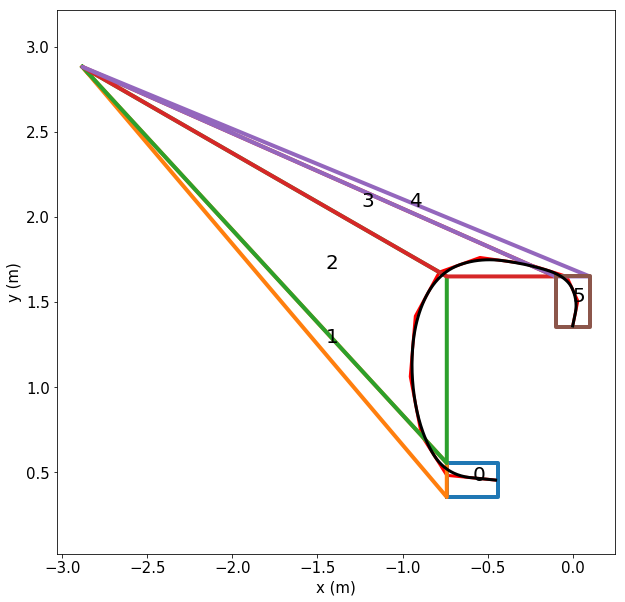

SETTING ENDPOINTS
Calculated C-Space: 0.157067 seconds
Set up graph: 0.241064 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 44 45
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001866 seconds
ADDING COSTS
Number of costs 12
0.004457 seconds
ADDING CONSTRAINTS
None
Number of constraints 1051
0.141534 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.133616 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.153588 seconds
Set up graph: 0.251822 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 44 45
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.003002 seconds
ADDING COSTS
Number of costs 11
0.004097 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 52
0.027821 seconds
PLANNING
SolutionResult.kSolutionFound
So

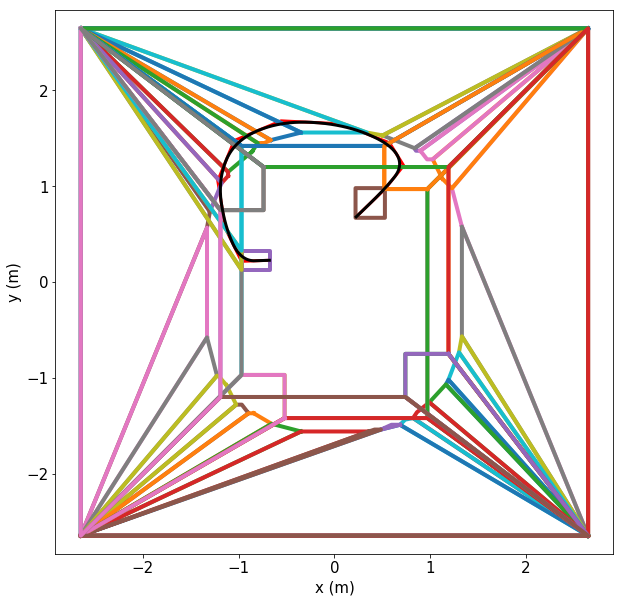

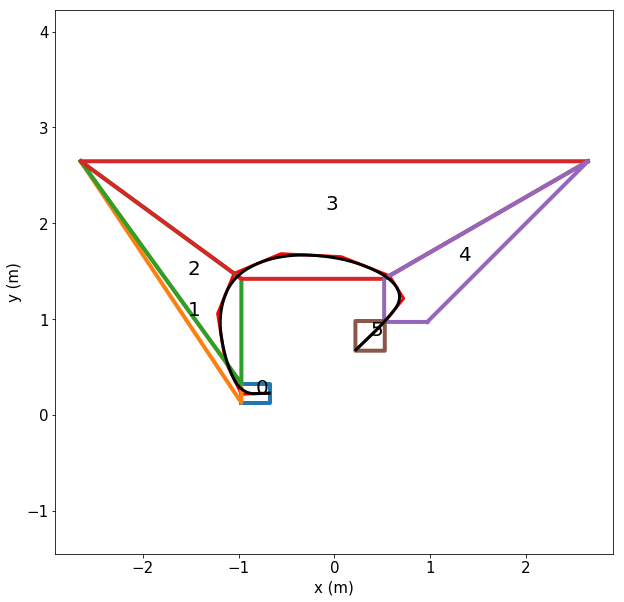

SETTING ENDPOINTS
Calculated C-Space: 0.282408 seconds
Set up graph: 0.294395 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 36 37
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.001787 seconds
ADDING COSTS
Number of costs 12
0.004541 seconds
ADDING CONSTRAINTS
None
Number of constraints 767
0.088282 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.172047 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.169634 seconds
Set up graph: 0.180971 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 36 37
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002805 seconds
ADDING COSTS
Number of costs 11
0.004604 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 16
0.018965 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.025

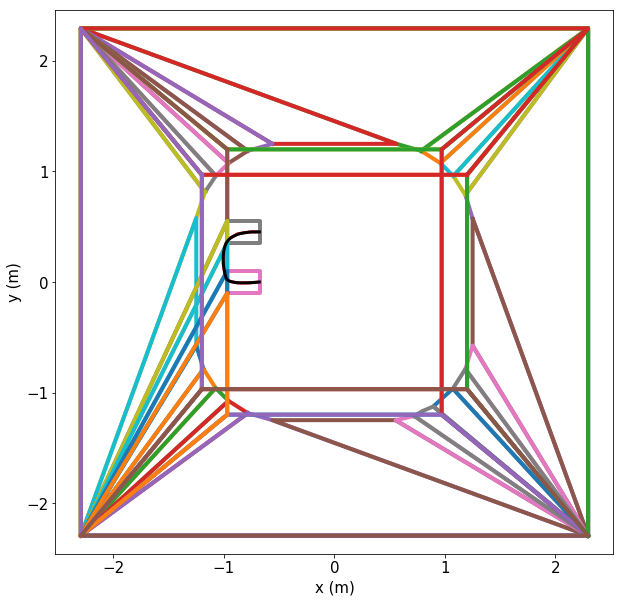

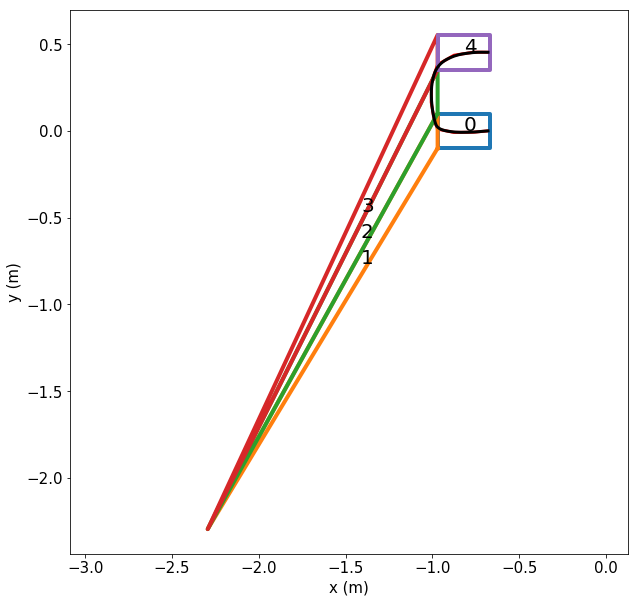

SETTING ENDPOINTS
Calculated C-Space: 0.274096 seconds
Set up graph: 0.244816 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-1.1328125 -0.2265625) 90.0
found path endpoint hulls 47 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.006182 seconds
ADDING COSTS
Number of costs 12
0.014419 seconds
ADDING CONSTRAINTS
None
Number of constraints 1089
0.140228 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.160470 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.168606 seconds
Set up graph: 0.215604 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-1.1328125 -0.2265625) 90.0
found path endpoint hulls 47 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002962 seconds
ADDING COSTS
Number of costs 11
0.004123 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 40
0.027588 seconds
PLANNING
SolutionResult.kSolutionFound
So

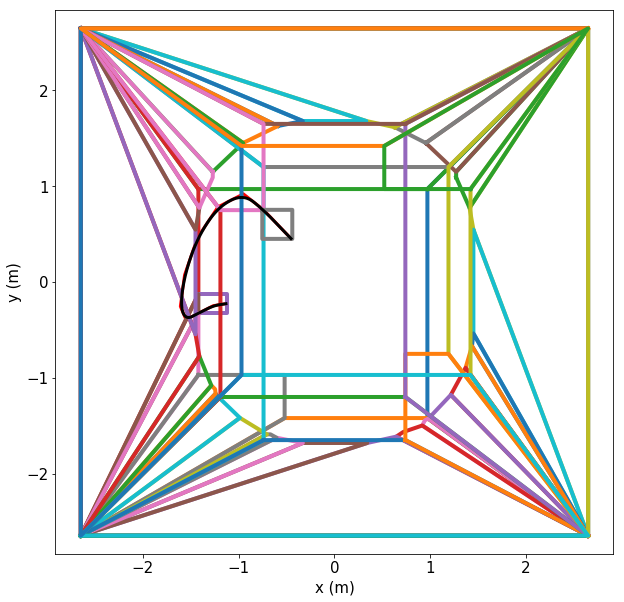

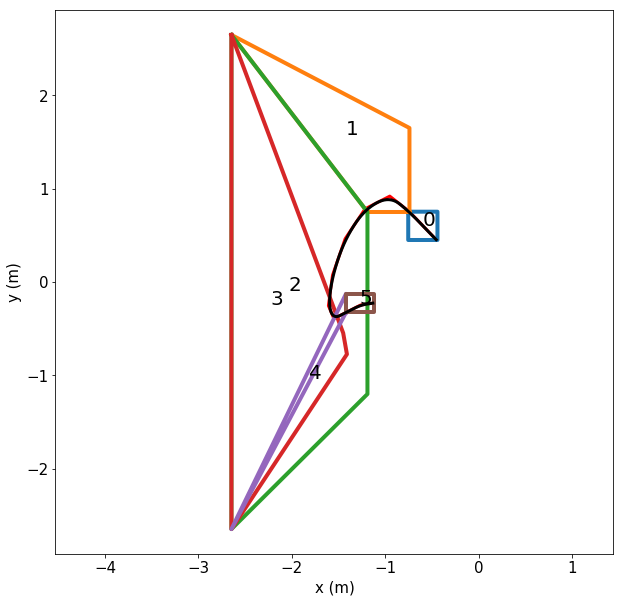

SETTING ENDPOINTS
Calculated C-Space: 0.175687 seconds
Set up graph: 0.186228 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.002159 seconds
ADDING COSTS
Number of costs 12
0.004915 seconds
ADDING CONSTRAINTS
None
Number of constraints 1107
0.132200 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.154993 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.207443 seconds
Set up graph: 0.181553 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.003067 seconds
ADDING COSTS
Number of costs 11
0.004066 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.028268 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.039095 seconds

tr

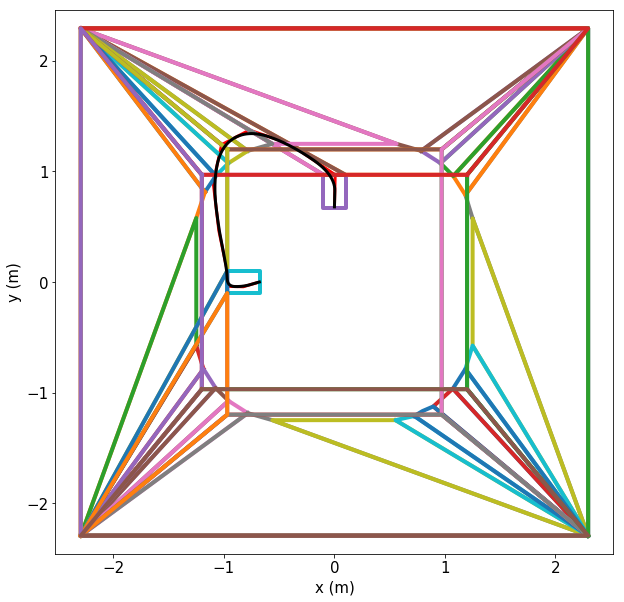

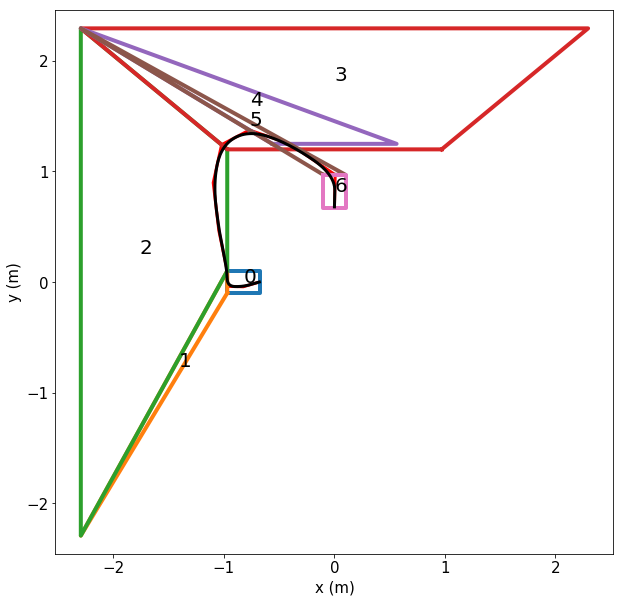

SETTING ENDPOINTS
Calculated C-Space: 0.321777 seconds
Set up graph: 0.295347 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001879 seconds
ADDING COSTS
Number of costs 12
0.004688 seconds
ADDING CONSTRAINTS
None
Number of constraints 899
0.107446 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.220551 seconds

trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 1.000000, result: 1.000000
trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 6.759190, result: 6.800000


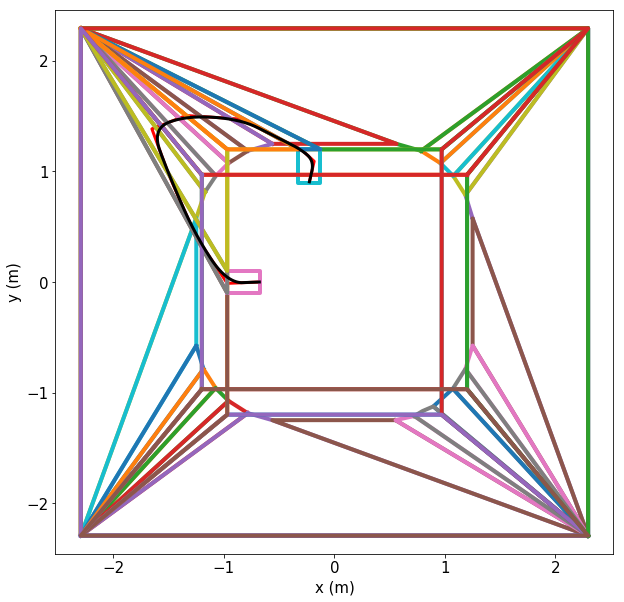

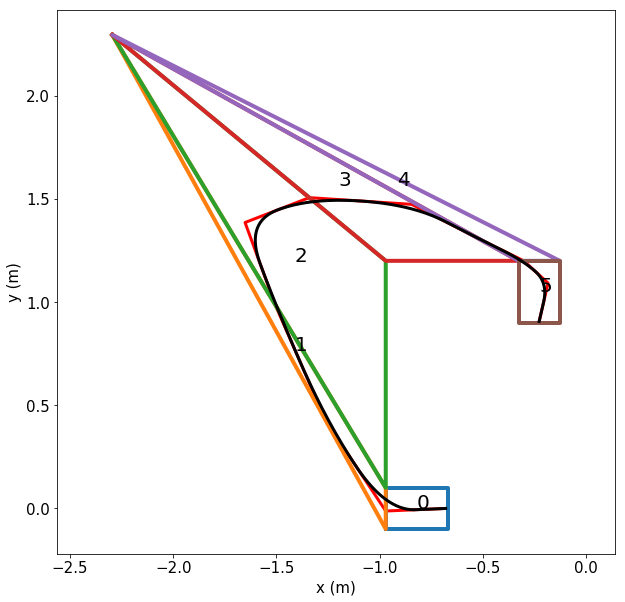

SETTING ENDPOINTS
Calculated C-Space: 0.186654 seconds
Set up graph: 0.203232 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 42 45
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001871 seconds
ADDING COSTS
Number of costs 12
0.004570 seconds
ADDING CONSTRAINTS
None
Number of constraints 899
0.106274 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.183398 seconds

trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 1.000000, result: 1.000000
trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 6.510127, result: 6.600000


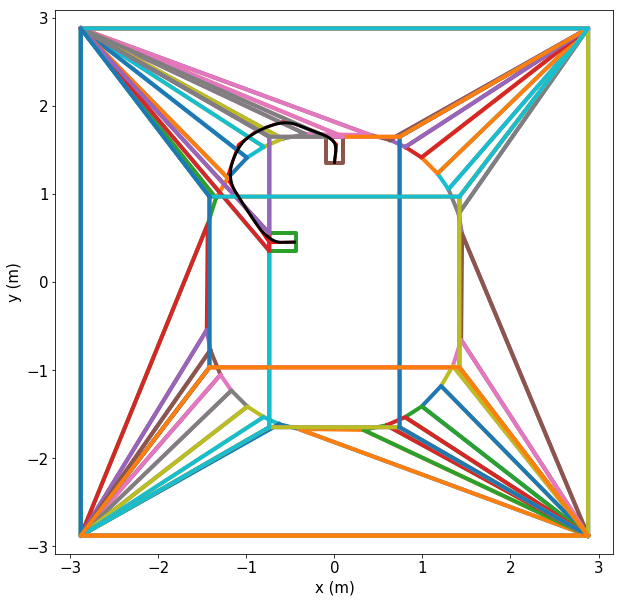

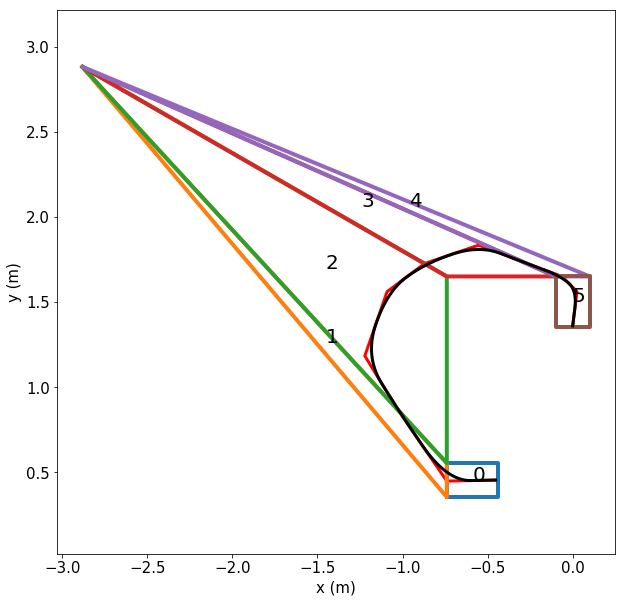

SETTING ENDPOINTS
Calculated C-Space: 0.174052 seconds
Set up graph: 0.265638 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 44 45
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001958 seconds
ADDING COSTS
Number of costs 12
0.004883 seconds
ADDING CONSTRAINTS
None
Number of constraints 1051
0.129144 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.134028 seconds

trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 1.000000, result: 1.000000
trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 7.767905, result: 7.800000


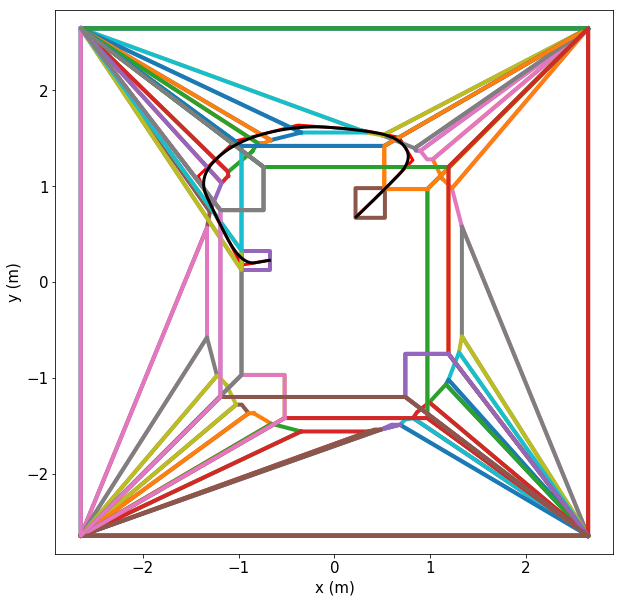

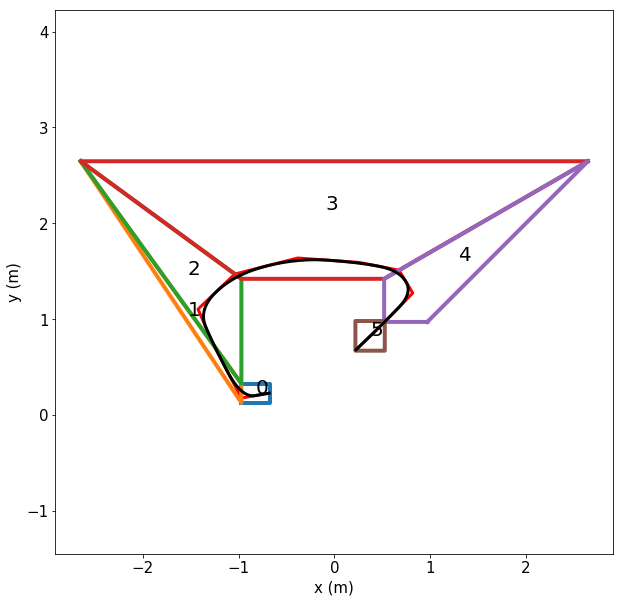

SETTING ENDPOINTS
Calculated C-Space: 0.283407 seconds
Set up graph: 0.281838 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 36 37
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.001684 seconds
ADDING COSTS
Number of costs 12
0.004630 seconds
ADDING CONSTRAINTS
None
Number of constraints 767
0.091351 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.273409 seconds

trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 1.000000, result: 1.000000
trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 3.087172, result: 3.200000


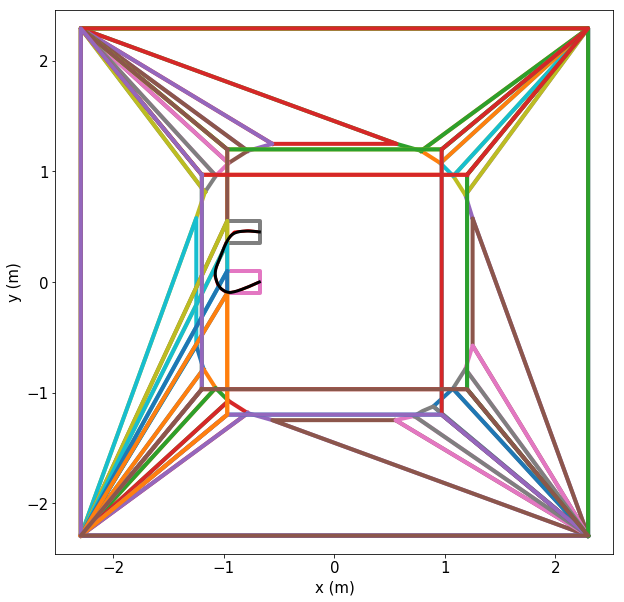

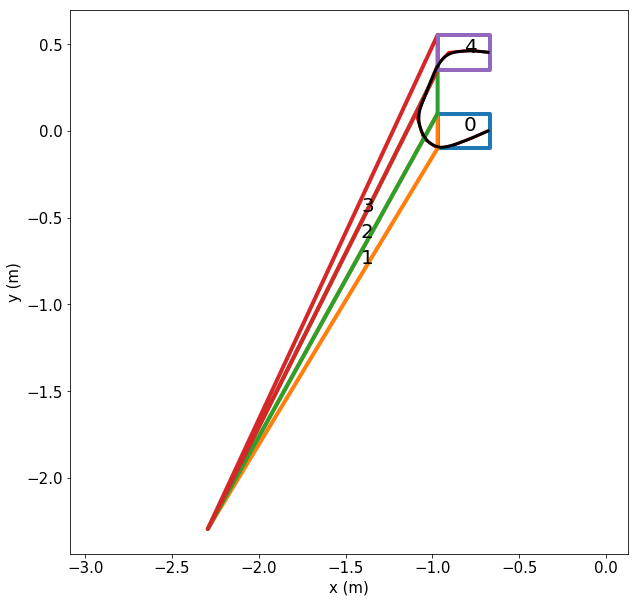

SETTING ENDPOINTS
Calculated C-Space: 0.248142 seconds
Set up graph: 0.349181 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-1.1328125 -0.2265625) 90.0
found path endpoint hulls 47 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001818 seconds
ADDING COSTS
Number of costs 12
0.004383 seconds
ADDING CONSTRAINTS
None
Number of constraints 1089
0.154924 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.235852 seconds

trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 1.000000, result: 1.000000
trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 5.477226, result: 5.600000


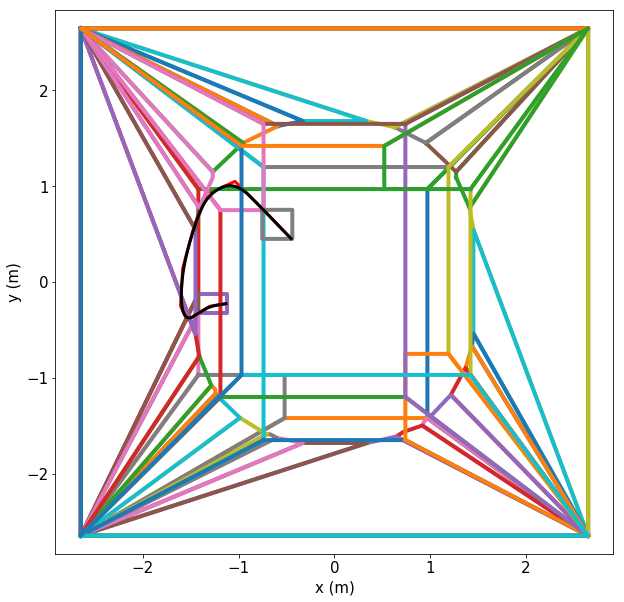

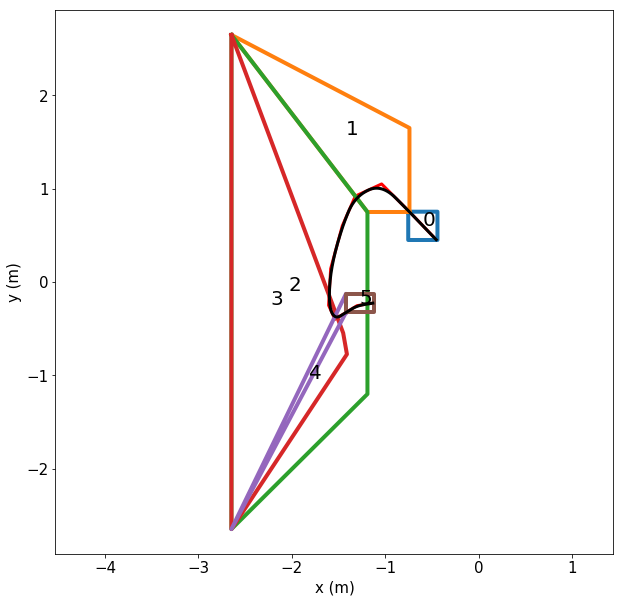

SETTING ENDPOINTS
Calculated C-Space: 0.354983 seconds
Set up graph: 0.235120 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4
INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.002426 seconds
ADDING COSTS
Number of costs 12
0.015145 seconds
ADDING CONSTRAINTS
None
Number of constraints 1107
0.170737 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.231266 seconds

trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 1.000000, result: 1.000000
trajs (1, 11, 6) (1, 10, 4)
Time Scaling target: 5.388066, result: 5.400000


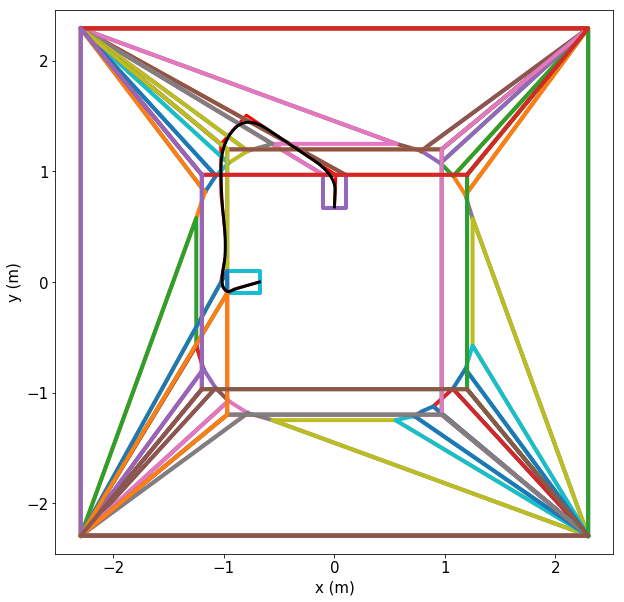

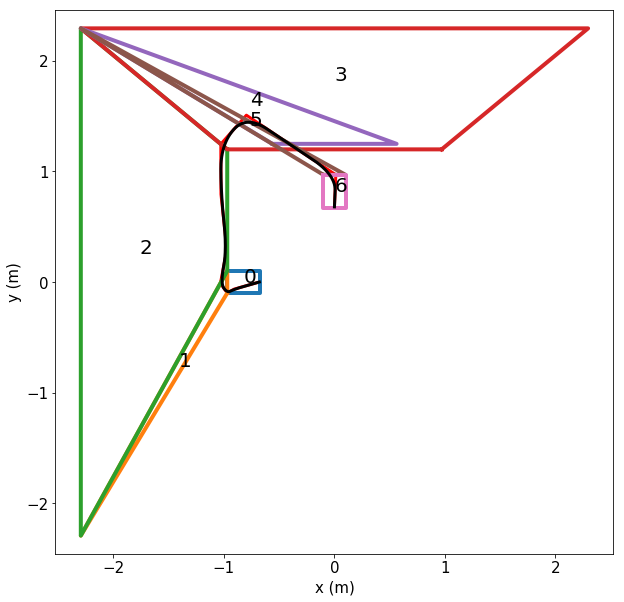

In [9]:
boats = {'line no-init':(None, ShapeBoat),
         'spline no-init':(None, ShapeBoat_spline),
         'spline init':(ShapeBoat_spline, ShapeBoat_spline)
        }

results = experiments(tests, boats)

In [10]:
table = print_results_tables(results)

line no-init
experiment    solve_time_init      solve_time_final    solve_time    pos_cost_avg    ang_cost_avg
------------  -----------------  ------------------  ------------  --------------  --------------
1_step1                                       0.148         0.148           3.579           0.000
1_step2                                       0.120         0.120           3.166           0.000
2_step1                                       0.092         0.092           5.628           9.744
2_step2                                       0.185         0.185           4.466           9.744
3_step1                                       0.123         0.123           0.523           0.000
3_step2                                       0.119         0.119           9.815           0.000
spline init
experiment      solve_time_init    solve_time_final    solve_time    pos_cost_avg    ang_cost_avg
------------  -----------------  ------------------  ------------  --------------  ----------

In [11]:
#print in Banti Thesis Format
print_results_tables(results, latex=True)

line no-init
experiment    solve_time_init    solve_time_final    solve_time        pos_cost_avg    ang_cost_avg
------------  -----------------  ------------------  ----------------  --------------  --------------
& 1 step1     & -                & 0.150             & \textbf{0.148}  & 3.580         & 0.000 \\
& 1 step2     & -                & 0.120             & \textbf{0.120}  & 3.170         & 0.000 \\
& 2 step1     & -                & 0.090             & \textbf{0.092}  & 5.630         & 9.740 \\
& 2 step2     & -                & 0.180             & 0.180           & 4.470         & 9.740 \\
& 3 step1     & -                & 0.120             & \textbf{0.123}  & 0.520         & 0.000 \\
& 3 step2     & -                & 0.120             & \textbf{0.119}  & 9.810         & 0.000 \\
spline init
experiment    solve_time_init    solve_time_final    solve_time        pos_cost_avg      ang_cost_avg
------------  -----------------  ------------------  ----------------  ------------

In [ ]:
write_results(results, 'result_IROS_slow')